# Imports

In [5]:
from utils import *

# Preprocessing

## Loading datasets

In [15]:
# Reading CSV files
train_data = pd.read_csv("../../Data/Combined data/train_data.csv")
val_data = pd.read_csv("../../Data/Combined data/validation_data.csv")
test_data = pd.read_csv("../../Data/Combined data/test_data.csv")


In [16]:
df = pd.concat([train_data, val_data, test_data])
df

,Unnamed: 0,text,class_label,text_preprocessed
0,20130,German wage talks to include new focus: reduce...,0,german wage talk includ new focu reduc work ho...
1,13247,OBAMA’S GITMO BOARD RELEASES “High Risk” Explo...,1,obama gitmo board releas high risk explos expe...
2,12633,Ramadan Rage: Muslim Who Ran Down Five Men wit...,0,ramadan rage muslim ran five men van prais goo...
3,10457,Shaun King is Really Mad About President Trump...,0,shaun king realli mad presid trump first budge...
4,18166,O’Keefe Releases 4th Undercover Video: Robert ...,1,okeef releas 4th undercov video robert creamer...
5,2890,Hillary Clinton Sells 20% of US Uranium To Rus...,1,hillari clinton sell 20 us uranium russia wtf ...
6,8437,"Trump Meets with MLB Commissioner, Yankees Pre...",0,trump meet mlb commission yanke presid trump t...
7,866,Review: Bryan Cranston Shines as Lyndon Johnso...,0,review bryan cranston shine lyndon johnson way...
8,14959,"North Korean soldier, shot and wounded, defect...",0,north korean soldier shot wound defect south s...
9,6291,A Conflicted Donald Trump Tries a New Tactic: ...,0,conflict donald trump tri new tactic stick scr...


# EDA

## Class distribution

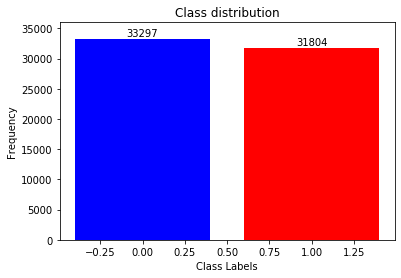

<Figure size 432x288 with 0 Axes>

In [17]:
x = df['class_label'].unique()
y = df['class_label'].value_counts().values


def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+500,y[i], ha='center') # Second element - adjust space above bar to plot the label

fig = plt.figure()
plt.ylim([0, 36000]) # Set y-axis limits
plt.bar(x,y, color={'blue', 'red'})
plt.title('Class distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

# plt.savefig('images/class_distribution.png')


# Loading preprocessed data with lemmatization

In [6]:
# Reading CSV files
df1 = pd.read_csv("all_data_preprocessed_w_lemmatization/all_data_preprocessed_w_lemmatization.csv")
df1

,Unnamed: 0,text,class_label,text_preprocessed
0,0,Donald Trump Sends Out Embarrassing New Year’...,1,donald trump send embarrass new year eve messa...
1,1,Drunk Bragging Trump Staffer Started Russian ...,1,drunk brag trump staffer start russian collus ...
2,2,Sheriff David Clarke Becomes An Internet Joke...,1,sheriff david clark becom internet joke threat...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,1,trump ob even obama name code websit imag chri...
4,4,Pope Francis Just Called Out Donald Trump Dur...,1,pope franci call donald trump christma speech ...
5,5,Racist Alabama Cops Brutalize Black Boy While...,1,racist alabama cop brutal black boy handcuff g...
6,6,"Fresh Off The Golf Course, Trump Lashes Out A...",1,fresh golf cours trump lash fbi deputi directo...
7,7,Trump Said Some INSANELY Racist Stuff Inside ...,1,trump said insan racist stuff insid oval offic...
8,8,Former CIA Director Slams Trump Over UN Bully...,1,former cia director slam trump un bulli openli...
9,9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,1,watch brandnew protrump ad featur much kiss wi...


# Wordclouds

In [8]:
# Defining stopwords
stopwords_list = list(set(stopwords.words('english') + list(STOPWORDS))) # combine NLTK stopwords and wordcloud STOPWORDS
stopwords_list[:10] # Show some examples of stopwords

["shouldn't",
 'r',
 'itself',
 'before',
 "let's",
 'my',
 'few',
 'nor',
 "haven't",
 'into']

## All words

In [19]:
# Create wordcloud string to pass into wordcloud (data-df1)
wordcloud_string1 = ""
for text in df1['text_preprocessed']:
    wordcloud_string1 += text

wordcloud_string1[:500] # Show output string

'donald trump send embarrass new year eve messag disturb donald trump couldn t wish american happi new year leav instead give shout enemi hater dishonest fake news medium former realiti show star one job couldn t countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year presid angri pant tweet 2018 will great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news mediu'

In [20]:
fdist = nltk.FreqDist(wordcloud_string1.split(' '))
most_common = fdist.most_common(22)
most_common

[('said', 207585),
 ('trump', 196170),
 ('s', 181629),
 ('state', 100877),
 ('u', 97820),
 ('will', 96161),
 ('presid', 85432),
 ('peopl', 78663),
 ('one', 77012),
 ('mr', 76368),
 ('new', 69145),
 ('year', 65849),
 ('say', 62979),
 ('clinton', 58550),
 ('time', 58365),
 ('republican', 51874),
 ('govern', 48939),
 ('report', 48508),
 ('—', 47705),
 ('nation', 46697),
 ('american', 45841),
 ('go', 45697)]

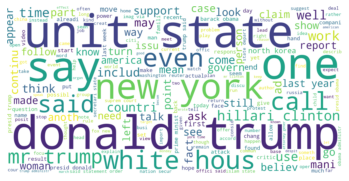

In [21]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string1)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
# cloud.to_file('images2/wordcloud_all.png')

In [9]:
# Create wordcloud string to pass into wordcloud (data-df)
wordcloud_string = ""
for text in df['text_preprocessed']:
    wordcloud_string += text

wordcloud_string[:500] # Show output string

'german wage talk includ new focu reduc work hour frankfurtberlin reuter trade union powerhous won 35hour work week german two decad ago mobil new campaign reduc work hour annual wage negoti kick nationwid ig metal germani s biggest union 23 million worker mainli car manufactur industri say shorter hour will help shift worker need care children elderli rel wide implic german societi evolv 21st centuri union s gambit success economist count strong wage rise will watch see deflationari effect domes'

In [10]:
fdist = nltk.FreqDist(wordcloud_string.split(' '))
most_common = fdist.most_common(22)

In [11]:
most_common

[('said', 207585),
 ('trump', 196170),
 ('s', 181498),
 ('state', 100869),
 ('will', 96160),
 ('us', 92263),
 ('presid', 85432),
 ('peopl', 78663),
 ('one', 77009),
 ('mr', 76368),
 ('new', 69145),
 ('year', 65848),
 ('say', 62979),
 ('clinton', 58549),
 ('time', 58358),
 ('republican', 51873),
 ('govern', 48939),
 ('report', 48507),
 ('—', 47705),
 ('nation', 46694),
 ('american', 45841),
 ('go', 45685)]

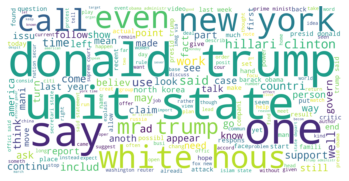

In [12]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
# cloud.to_file('images2/wordcloud_all.png')

# Sentiment Analysis

## Using TextBlob

In [7]:
from textblob import TextBlob

In [8]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getSentiment(polarity):
    if polarity > 0:
        return 'pos'
    elif polarity == 0:
        return 'neu'
    else:
        return 'neg'

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
df1['textblob_polarity'] = df1['text_preprocessed'].apply(getPolarity)
df1['textblob_sentiment']= df1['textblob_polarity'].apply(getSentiment)
df1['textblob_subjectivity'] = df1['text_preprocessed'].apply(getSubjectivity)

In [10]:
df1

,Unnamed: 0,text,class_label,text_preprocessed,textblob_polarity,textblob_sentiment,textblob_subjectivity
0,0,Donald Trump Sends Out Embarrassing New Year’...,1,donald trump send embarrass new year eve messa...,0.009343,pos,0.526978
1,1,Drunk Bragging Trump Staffer Started Russian ...,1,drunk brag trump staffer start russian collus ...,0.026106,pos,0.298970
2,2,Sheriff David Clarke Becomes An Internet Joke...,1,sheriff david clark becom internet joke threat...,-0.088409,neg,0.481573
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,1,trump ob even obama name code websit imag chri...,-0.020833,neg,0.341865
4,4,Pope Francis Just Called Out Donald Trump Dur...,1,pope franci call donald trump christma speech ...,-0.034259,neg,0.536111
5,5,Racist Alabama Cops Brutalize Black Boy While...,1,racist alabama cop brutal black boy handcuff g...,-0.139457,neg,0.542361
6,6,"Fresh Off The Golf Course, Trump Lashes Out A...",1,fresh golf cours trump lash fbi deputi directo...,-0.005556,neg,0.412963
7,7,Trump Said Some INSANELY Racist Stuff Inside ...,1,trump said insan racist stuff insid oval offic...,-0.035076,neg,0.222803
8,8,Former CIA Director Slams Trump Over UN Bully...,1,former cia director slam trump un bulli openli...,0.079870,pos,0.348810
9,9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,1,watch brandnew protrump ad featur much kiss wi...,0.186786,pos,0.404524


## Plotting counts of Sentiment
### For True Articles

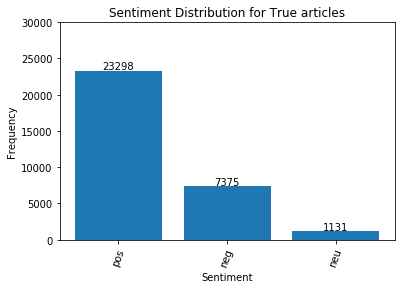

In [19]:
x = df1[df1['class_label']==0]['textblob_sentiment'].unique()
y = df1[df1['class_label']==0]['textblob_sentiment'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+200,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 30000]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Sentiment Distribution for True articles')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

### For Fake Articles

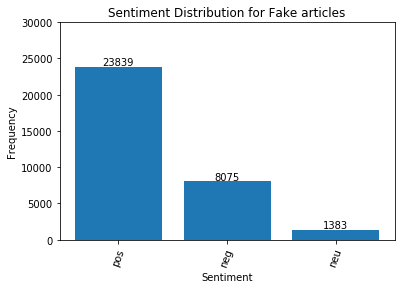

In [20]:
x = df1[df1['class_label']==1]['textblob_sentiment'].unique()
y = df1[df1['class_label']==1]['textblob_sentiment'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+200,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 30000]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Sentiment Distribution for Fake articles')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

## Subjectivity Distribution
### For True articles

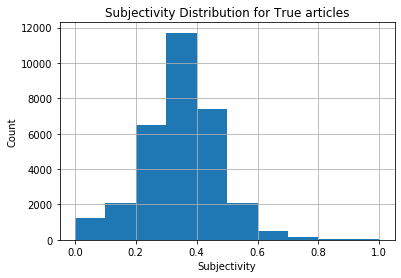

In [13]:
true_subjectivity_hist = df1[df1['class_label']==0].hist(column='textblob_subjectivity')
plt.title('Subjectivity Distribution for True articles')
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.savefig('images/sentiment analysis/subjectivity_distribution_true_articles.png')

### For Fake Articles

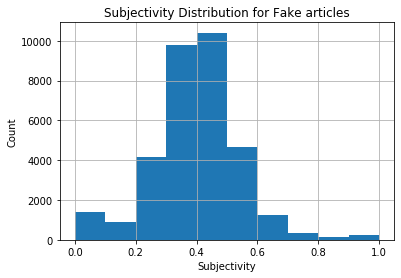

In [14]:
fake_subjectivity_hist = df1[df1['class_label']==1].hist(column='textblob_subjectivity')
plt.title('Subjectivity Distribution for Fake articles')
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.savefig('images/sentiment analysis/subjectivity_distribution_fake_articles.png')

## Polarity Distribution
### For True articles

Text(0, 0.5, 'Count')

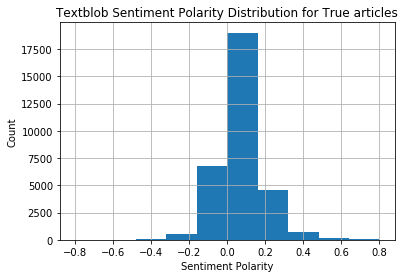

In [32]:
true_texblob_polarity_hist = df1[df1['class_label']==0].hist(column='textblob_polarity')
plt.title('Textblob Sentiment Polarity Distribution for True articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')

### For Fake articles

Text(0, 0.5, 'Count')

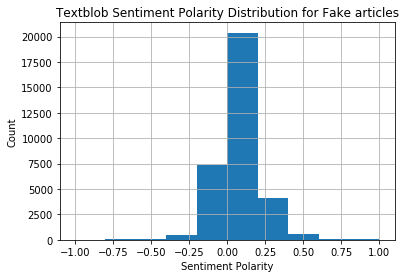

In [11]:
fake_textblob_polarity_hist = df1[df1['class_label']==1].hist(column='textblob_polarity')
plt.title('Textblob Sentiment Polarity Distribution for Fake articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')